In [60]:
import pandas as pd

In [61]:
# reading data in csv file using pandas
df = pd.read_csv('filtered_tweets.csv')

In [62]:
df.head()

,target,id,date,flag,user,text
0,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
1,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
2,0,1467813579,Mon Apr 06 22:20:31 PDT 2009,NO_QUERY,starkissed,@LettyA ahh ive always wanted to see rent lov...
3,0,1467818603,Mon Apr 06 22:21:49 PDT 2009,NO_QUERY,kennypham,"Sad, sad, sad. I don't know why but I hate thi..."
4,0,1467819650,Mon Apr 06 22:22:05 PDT 2009,NO_QUERY,antzpantz,@Viennah Yay! I'm happy for you with your job!...


In [63]:
# Remove mentions, emails and links
def removeAt(tweet):
    words = tweet.split(' ')
    return ' '.join(filter(lambda x: x and '@' not in x, words))

def removeLinks(tweet):
    words = tweet.split(' ')
    return ' '.join(filter(lambda x: not ('http://' in x.lower() or 'https://' in x.lower()), words))

In [64]:
# Apply formulas to clean data
df.text = df.text.apply(lambda x: removeAt(removeLinks(x.strip())))

In [65]:
# Cleaned dataframe 
df.drop_duplicates(subset='text', keep=False, inplace=True)

# sort dataframe by user 
df.sort_values(by='user', inplace=True)
df.head()

,target,id,date,flag,user,text
14524,0,1835705341,Mon May 18 06:34:45 PDT 2009,NO_QUERY,12gaBrowningGal,Blind. Definitely. They aren't the smartest bi...
68041,0,2211076285,Wed Jun 17 12:24:07 PDT 2009,NO_QUERY,12gaBrowningGal,"I'm killing me too! I'm hungry now- Pie, Outdo..."
85046,0,2299986642,Tue Jun 23 13:35:33 PDT 2009,NO_QUERY,12gaBrowningGal,My skeet game bites! I am not joking. I will h...
203184,4,2071364168,Sun Jun 07 19:16:31 PDT 2009,NO_QUERY,12gaBrowningGal,That's just because she trying to figure out w...
207475,4,2178187758,Mon Jun 15 07:19:40 PDT 2009,NO_QUERY,12gaBrowningGal,I am really not skilled enough to shoot trap. ...


In [66]:
# Create a dictionary consolidating users and tweets to send to LIWC 
user_list = df['user'].tolist()
tweets_list = df['text'].tolist()

user_tweet_dic = {}

for i in range(len(user_list)):
    user = user_list[i]
    tweet = tweets_list[i]
    
    if user not in user_tweet_dic:
        user_tweet_dic[user] = []
        user_tweet_dic[user].append(tweet)
    else:
        user_tweet_dic[user].append(tweet)
        
new_user_list = []
new_combined_tweets_list = []

for user, tweets in user_tweet_dic.items():
    combined_tweets = ' '.join(tweets)
    if len(combined_tweets.split(' ')) >= 100:
        new_user_list.append(user)
        new_combined_tweets_list.append(combined_tweets)
    
# Create a dataframe based on dictionary and exporting as a csv file
consolidated_tweets_df = pd.DataFrame({'user': new_user_list, 'tweets': new_combined_tweets_list})
consolidated_tweets_df.to_csv('consolidated_tweets_df.csv')

<div class='alert alert-info'>
    Imagine the group taking that csv file and putting it through the LIWC software to get the output! :D
    <br>
    The output will be saved in a file called LIWC2015 Results (consolidated_tweets_df.csv).csv that will be imported later
</div>

In [67]:
# Creating a dataframe for the first 500 users 
first_500_users = consolidated_tweets_df['user'].unique()[:500]
first_500_users_df = df[df['user'].isin(first_500_users)]

# Creating a dictionary of user and their tweets 
user_tweet_dictionary = {}

# Create a format that follows IBM Watson's format and saving it to the user_tweet_dictionary
for index, row in first_500_users_df.iterrows():
    user = row['user']
    text = row['text']
    
    tweet = {}
    
    tweet['content'] = text
    tweet['contenttype'] = 'text/plain'
    tweet['language'] = 'en'
    
    if user not in user_tweet_dictionary:
        user_tweet_dictionary[user] = {'contentItems': []}
        user_tweet_dictionary[user]['contentItems'].append(tweet)
    else:
        user_tweet_dictionary[user]['contentItems'].append(tweet)

<div class='alert alert-info'>
    The bottom few cells are commented out because we are using API calls to get the output, and after a certain number of calls, we will have to pay money!
    <br>
    Instead, we have saved the file called big5_df.csv that will also be imported later
</div>

In [68]:
# import json
# from ibm_watson import PersonalityInsightsV3
# from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# #API KEY provided on the service page 
# KEY = 'STximBrq6oOabT5yZteafZcbt3m6Xh6SUSVuWr3RW3V6'

# # Authentication via IBM's IAM (Identity and Access Management)
# authenticator = IAMAuthenticator(KEY)

# # Creating a service instance
# service = PersonalityInsightsV3(
#     version='2017-10-13',
#     authenticator=authenticator)

# # Setting service endpoint 
# service.set_service_url('https://gateway.watsonplatform.net/personality-insights/api')

In [69]:
# # Creating a dictionary to store results from IBM Watson
# results = {'User': [],
#           'Openness': [],
#           'Conscientiousness': [],
#           'Extraversion': [],
#           'Agreeableness': [],
#           'Emotional range': []}

# # creates profiles of users in user_tweet_dictionary and saves them to results
# for user, tweets in user_tweet_dictionary.items():
#     profile = service.profile(tweets, 'application/json', raw_scores=True, consumption_preferences=True).get_result()
    
#     results['User'].append(user)
#     results['Openness'].append(profile['personality'][0]['raw_score'])
#     results['Conscientiousness'].append(profile['personality'][1]['raw_score'])
#     results['Extraversion'].append(profile['personality'][2]['raw_score'])
#     results['Agreeableness'].append(profile['personality'][3]['raw_score'])
#     results['Emotional range'].append(profile['personality'][4]['raw_score'])

In [70]:
# # Create a dataframe from results dictionary and save csv to use
# big5_df = pd.DataFrame(results)
# big5_df.to_csv('big5_df.csv')

In [71]:
# Importing both the outputs of LIWC and IBM Watson (Big 5)
LIWC_df = pd.read_csv('LIWC2015 Results (consolidated_tweets_df.csv).csv')
LIWC_df.drop(0, inplace=True)
LIWC_df.drop(columns=['A', 'C'], inplace=True)
LIWC_df.rename(columns={'B': 'User'}, inplace=True)
big5_df = pd.read_csv('big5_df.csv').drop(columns=['Unnamed: 0'])

# Merge dataframes together
updated_df = pd.merge(big5_df, LIWC_df)
updated_df.head()

,User,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,WC,Analytic,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,12gaBrowningGal,0.764999,0.656144,0.548956,0.788804,0.439579,388,27.36,34.94,68.96,...,2.58,0.00,0.00,0.52,12.37,0.52,0.0,3.61,0.00,0.00
1,15Stepz,0.748124,0.690716,0.564859,0.823930,0.410770,254,26.07,70.94,84.80,...,9.45,0.39,0.00,1.18,0.39,1.57,0.0,4.33,1.57,0.00
2,16_MileyCyrus,0.672814,0.637773,0.525612,0.811025,0.563704,1164,21.04,64.42,58.80,...,3.26,0.52,0.00,2.15,13.57,0.43,0.0,1.37,0.26,1.03
3,18percentgrey,0.789412,0.607883,0.528168,0.772518,0.461528,931,47.25,53.87,58.83,...,4.83,0.64,0.75,1.61,2.26,1.93,0.0,3.22,1.29,2.26
4,19fischi75,0.706904,0.627109,0.447471,0.803232,0.518279,1707,48.43,48.83,63.95,...,0.70,0.23,0.00,3.10,1.64,3.87,0.0,0.00,2.58,3.81


In [72]:
def normalise(number):
    return round(number*100,2)

updated_df['Openness'] = updated_df['Openness'].apply(normalise)
updated_df['Conscientiousness'] = updated_df['Conscientiousness'].apply(normalise)
updated_df['Extraversion'] = updated_df['Extraversion'].apply(normalise)
updated_df['Agreeableness'] = updated_df['Agreeableness'].apply(normalise)
updated_df['Emotional range'] = updated_df['Emotional range'].apply(normalise)

In [73]:
def readability_score(row):
    sixletter = row['Sixltr']
    wps = row['WPS'] 
    wordcount = row['WC']
    
    readability = (-1 * sixletter) + wps - wordcount + 3
    return readability 

updated_df['readability'] = updated_df.apply(readability_score, axis=1)

In [74]:
def readability_percentile(score):
    readability_range = updated_df['readability'].max() - updated_df['readability'].min()
    return -score/readability_range*100

updated_df['readability'] = updated_df['readability'].apply(readability_percentile)

In [75]:
def composite_score(row):    
    #intermediate numbers
    sixletter = row['Sixltr']
    articles = row['article']
    pasttense = row['focuspast']
    presenttense = row['focuspresent']
    firstperson = 100 - row['i'] #inverse of first person singular pronoun
    discrepancy = row['discrep']
    wps = row['WPS'] #words per sentence
    wordcount = row['WC']
    
    #features
    #Distancing (0.19) - six letter words, articles, past tense, and the inverse of first person singular pronouns, present tense and discrepancy words
    
    Distancing = (sixletter + articles + pasttense + firstperson + presenttense + discrepancy)/6 #average of 6 intermediate numbers
    
    #Readability (-0.32) - multiplying negative one by six letter words, adding words per sentence, subtracting the amount of words recognized by the LIWC dictionary, and adding three
#     Readability = (-1 * sixletter) + wps - wordcount + 3
    Readability = row['readability']
    
    #Swear (0.31) 
    Swear = row['swear']
    
    #Anger (0.22)
    Anger = row['anger']
    
    #Agreeability (-0.43)
    Agreeability = row['Agreeableness']
        
    #Neuroticism (0.3)
    Neuroticism = row['Emotional range']
    
    #calculate composite score
    Total = 0.19 + 0.32 + 0.31 + 0.22 + 0.3 + 0.43
    Psychopathy_Score = 0.19/Total * Distancing - 0.32/Total * Readability + 0.31/Total * Swear + 0.22/Total * Anger - 0.43/Total * Agreeability + 0.3/Total * Neuroticism
    
    #write into dictionary
    return Psychopathy_Score

updated_df['composite score'] = updated_df.apply(composite_score, axis=1)

In [76]:
def score_percentile(score):
    max_score = updated_df['composite score'].max()
    min_score = updated_df['composite score'].min()
    score_range = max_score - min_score
    return (score-min_score)/score_range*100

updated_df['composite score percentile'] = updated_df['composite score'].apply(score_percentile)

In [77]:
updated_df = updated_df[['User', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'readability', 'composite score', 'composite score percentile']]

In [78]:
updated_df.head()

,User,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,WC,Analytic,Clout,Authentic,...,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,readability,composite score,composite score percentile
0,12gaBrowningGal,76.50,65.61,54.90,78.88,43.96,388,27.36,34.94,68.96,...,0.52,12.37,0.52,0.0,3.61,0.00,0.00,18.249702,-12.462168,55.478689
1,15Stepz,74.81,69.07,56.49,82.39,41.08,254,26.07,70.94,84.80,...,1.18,0.39,1.57,0.0,4.33,1.57,0.00,10.837813,-12.550057,55.069850
2,16_MileyCyrus,67.28,63.78,52.56,81.10,56.37,1164,21.04,64.42,58.80,...,2.15,13.57,0.43,0.0,1.37,0.26,1.03,54.343380,-17.747231,30.893563
3,18percentgrey,78.94,60.79,52.82,77.25,46.15,931,47.25,53.87,58.83,...,1.61,2.26,1.93,0.0,3.22,1.29,2.26,43.858291,-16.418514,37.074506
4,19fischi75,70.69,62.71,44.75,80.32,51.83,1707,48.43,48.83,63.95,...,3.10,1.64,3.87,0.0,0.00,2.58,3.81,78.600174,-22.679146,7.951210


In [79]:
updated_df.sort_values(by='composite score', ascending=False, inplace=True)

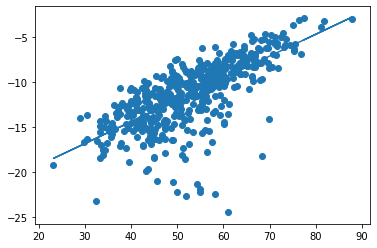

In [80]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = updated_df[['Emotional range']]
y = updated_df['composite score']

reg = LinearRegression()
reg.fit(X, y)
y_predictions = reg.predict(X)

plt.plot(X,y_predictions)
plt.scatter(X, y)
plt.show()

In [156]:
# getting users who are psychopathic (1% of population)
number_1_percent = 0.01 * len(updated_df) # 5 people
updated_df['psychopath'] = list(range(500))

updated_df['psychopath'][0:9] = 1
updated_df['psychopath'][9:] = 0

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
# replace features by text of user 
updated_df = updated_df[['User','psychopath']]
updated_df = pd.merge(updated_df,consolidated_tweets_df.rename(columns={'user':'User'}),how='left')[['User','tweets','psychopath']]

In [158]:
updated_df.head(10)

,User,tweets,psychopath
0,Abby_ox,wooo!! finished my lamp for Dt #LoveEverybody ...,1
1,BethanyAnn614,ugh. I don't like today.i much prefer tomorrow...,1
2,Benjimonicus,Walking to stow This family guy is OLD Morning...,1
3,BiGVixXen,no I didn't have time! I rushed outta the hous...,1
4,DaniScot,depends on the kind of video.... I'm pretty su...,1
5,CoConutShelle,I want more followers... Follow me please! x i...,1
6,BonjourHoney,"No, I just heard about it from someone Who bat...",1
7,Bastante_P,u forgot to add I'm also confined to a very sm...,1
8,ACsBarbieGirl69,ugh that sucks hun it does indeed!!!! See ya h...,1
9,Beccixo,i really hate revising it is so boring and dos...,0


In [159]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score

In [160]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

word_Lemmatized = WordNetLemmatizer()

def preprocessing(text):
    final_words = []
    # lowercase
    text = text.lower()
    # tokenize
    text = word_tokenize(text)
    
    for word, tag in pos_tag(text):
        # remove stopwords and only keep alphabets
        if word not in stopwords.words('english') and word.isalpha():
            # lemmatize words
            word_final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            # append final words to final_words list
            final_words.append(word_final)
            
    # return final string
    return ' '.join(final_words)

In [161]:
updated_df['cleaned_text'] = updated_df['tweets'].apply(preprocessing)
updated_df.head()

,User,tweets,psychopath,cleaned_text
0,Abby_ox,wooo!! finished my lamp for Dt #LoveEverybody ...,1,wooo finish lamp dt loveeverybody loveeverybod...
1,BethanyAnn614,ugh. I don't like today.i much prefer tomorrow...,1,ugh like much prefer tomorrow boo leave work h...
2,Benjimonicus,Walking to stow This family guy is OLD Morning...,1,walk stow family guy old morning get sleep lli...
3,BiGVixXen,no I didn't have time! I rushed outta the hous...,1,time rush outta house hair ruin rain already p...
4,DaniScot,depends on the kind of video.... I'm pretty su...,1,depends kind video pretty sure whole tonight c...


In [162]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(
    updated_df['cleaned_text'],updated_df['psychopath'],test_size=0.2)

In [163]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(updated_df['cleaned_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [164]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [168]:
predictions_NB = Naive.predict(Test_X_Tfidf)
print(f"Accuracy: {round(accuracy_score(predictions_NB, Test_Y)*100, 2)}%")


def predict_review(input_string):
    
    lower_string = input_string.lower()
    token_string = word_tokenize(lower_string)
    
    final_words = []
    for word, tag in pos_tag(token_string):
        if word not in stopwords.words('english') and word.isalpha():
            word_final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            final_words.append(word_final)
            
    transformed_string = Tfidf_vect.transform(final_words)
    print(transformed_string)
    
    if Naive.predict(transformed_string)[0] == 1:
        return "Psychopathic!!!"
    else:
        return "You are normal"

predict_review('sleep')

Accuracy: 98.0%
  (0, 10646)	1.0


'You are normal'

In [166]:
import numpy as np
from wordcloud import WordCloud

pyscholist = ' '.join(list(updated_df[updated_df['psychopath'] == 1]['cleaned_text']))


import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

def create_word_cloud(string):
   
   cloud = WordCloud(background_color = "white", max_words = 200)
   cloud.generate(string)
   cloud.to_file("wordCloud.png")

create_word_cloud(pyscholist)

In [167]:
import numpy as np
from wordcloud import WordCloud

pyscholist = ' '.join(list(updated_df[updated_df['psychopath'] == 0]['cleaned_text']))


import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

def create_word_cloud(string):
   
   cloud = WordCloud(background_color = "white", max_words = 200)
   cloud.generate(string)
   cloud.to_file("wordCloud_non_psychopatic.png")

create_word_cloud(pyscholist)